### Age Detection of Indian Actors

In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 

In [3]:
# Reading the data
train = pd.read_csv('agedetectiontrain/train.csv')
test = pd.read_csv('agedetectiontest/test.csv')

Age group: MIDDLE


C:\Users\anaswara\AppData\Local\Temp\ipykernel_12512\335497778.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('agedetectiontrain/Train', img_name))


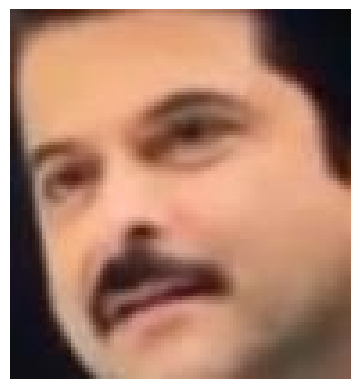

In [5]:
# Displaying any random movie character along with age group
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('agedetectiontrain/Train', img_name))

print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

### Few problems with the images:
- Variations in shape: One image has a shape of (66, 46) whereas another has (102, 87).
- Multiple viewpoints: Faces with different view possible!
- Discrepancy in brightness and contrast.
- Quality of images: Some images were found to be too pixelated.

In [7]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('agedetectiontrain/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)

train_x = np.stack(temp)

C:\Users\anaswara\AppData\Local\Temp\ipykernel_12512\22312541.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [9]:
# Image resizing of test data into single numpy array
temp = []
for img_name in test.ID:
    img_path = os.path.join('agedetectiontest/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)

test_x = np.stack(temp)

C:\Users\anaswara\AppData\Local\Temp\ipykernel_12512\3830458602.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [10]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.

In [11]:
# Knowing the distribution of classes in data
train.Class.value_counts(normalize=True)

Class
MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: proportion, dtype: float64

In [13]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.to_categorical(train_y)

### Building a Deep Neural Network for Age Group Detection

In [14]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

In [15]:
# Defining the network
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

c:\Users\anaswara\anaconda3\envs\deepl-env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5498 - loss: 0.9473
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5961 - loss: 0.8549
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6146 - loss: 0.8245
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6169 - loss: 0.8251
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6294 - loss: 0.8040


In [18]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6314 - loss: 0.7987 - val_accuracy: 0.6311 - val_loss: 0.8016
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6262 - loss: 0.8092 - val_accuracy: 0.6376 - val_loss: 0.8047
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6368 - loss: 0.7911 - val_accuracy: 0.6306 - val_loss: 0.8134
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6472 - loss: 0.7804 - val_accuracy: 0.6208 - val_loss: 0.8037
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6461 - loss: 0.7824 - val_accuracy: 0.6514 - val_loss: 0.7721


In [20]:
# Predicting and importing the result in a csv file
pred_probs = model.predict(test_x)
pred = np.argmax(pred_probs, axis=-1)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('out.csv', index=False)

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


 19/208 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

C:\Users\anaswara\AppData\Local\Temp\ipykernel_12512\635746275.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('agedetectiontest/Test', img_name))


208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Original: MIDDLE Predicted: MIDDLE


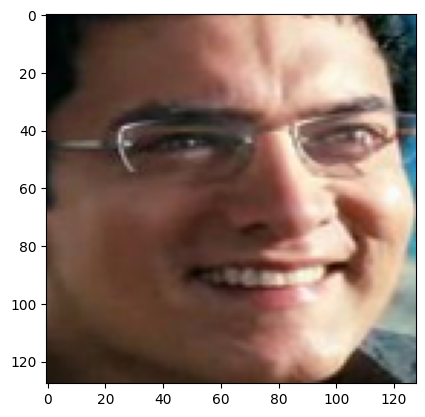

In [23]:
# Visual Inspection of predictions
idx = 2481
img_name = test.ID[idx]

img = imageio.imread(os.path.join('agedetectiontest/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = np.argmax(model.predict(test_x), axis=-1)
pred_labels = lb.inverse_transform(pred)
print('Original:', train.Class[idx], 'Predicted:', pred_labels[idx])

#### This is the result at current 64.51% training accuracy of the model. 
#### The model can be further improved using hyper-parameter tuning as well as using other image processing techniques.